In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

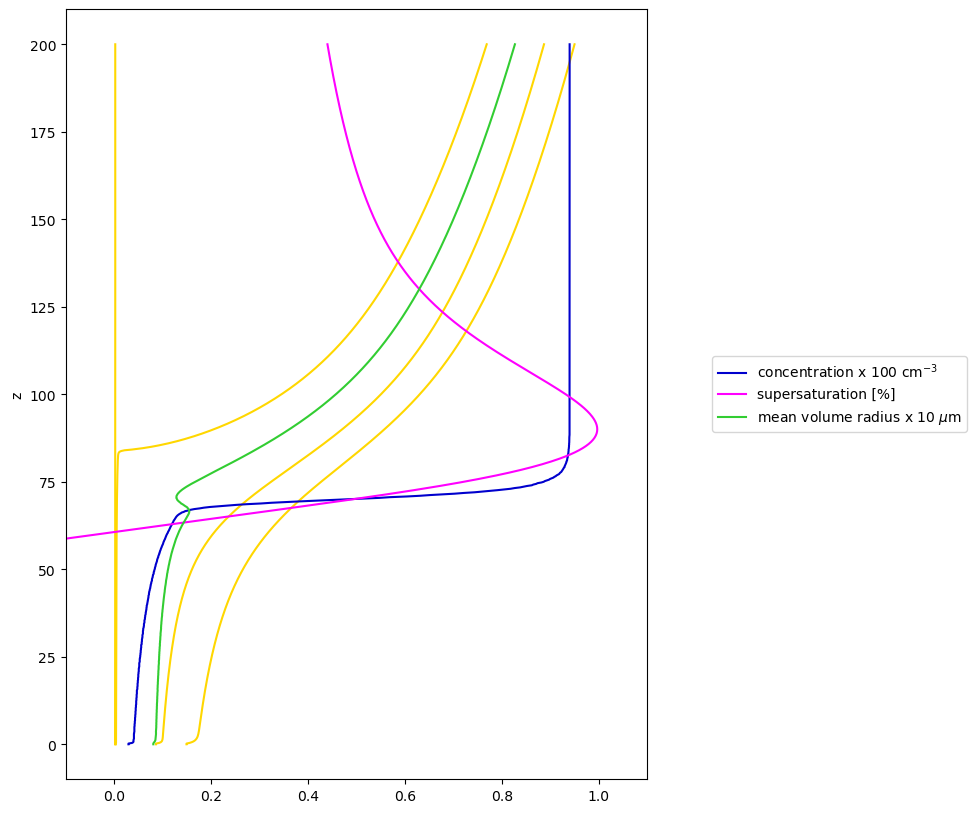

In [2]:
vertical_velocity=2
dt=0.1
rhod=1.1
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
ax.set_ylabel('z')    

fp="data.nc"
nc = netCDF4.Dataset(fp)
RH=nc['RH'][:]
mom0=nc['moment 0'][:]
mom3=nc['moment 3'][:]
rw=np.sqrt(np.asarray(nc['wet radius squared'][:]))
n_tot= np.multiply(mom0,rhod)*1e-6 #1/cm-3 
rv3=np.divide(mom3,mom0) #m^3
rv=np.cbrt(rv3) #\mu m
z=np.arange(len(RH))*vertical_velocity*dt

for drop_id in [0,120,700,800]:
    ax.plot(rw[:,drop_id]*1e6/10,z, c='gold')
ax.plot(n_tot/100,z,label='concentration x 100 cm$^{-3}$',c='mediumblue')
ax.plot((RH-1)*100,z,label='supersaturation [%]',c='magenta')
ax.plot(rv*1e6/10,z,label='mean volume radius x 10 $\mu$m',c='limegreen')
ax.set_xlim(-0.1,1.1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [3]:
for iz in np.arange(0,1000,50):
    fig = plt.figure(1, figsize=(12,10))
    ax = plt.subplot(111)
    ax.set_ylabel('z')  
    ax.plot(n_tot[:iz]/100,z[:iz],label='concentration x 100 cm$^{-3}$',c='mediumblue')
    ax.plot((RH[:iz]-1)*100,z[:iz],label='supersaturation [%]',c='magenta')
    ax.plot(rv[:iz]*1e6/10,z[:iz],label='mean volume radius x 10 $\mu$m',c='limegreen')
    ax.plot(rw[:iz,0]*1e6/10,z[:iz], c='silver',linewidth=1,label='radii of selected droplets x 10 $\mu$m') 
    for drop_id in [120,700,800]:
        ax.plot(rw[:iz,drop_id]*1e6/10,z[:iz], c='silver',linewidth=1)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(0,210)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.savefig('animation/'+str(iz*(vertical_velocity*dt))+'.png')
    plt.close()